# This is a tentative analysis on the video game ratings 


## The data set was scaped from <a href= http://www.metacritic.com/>Metacritic</a>. It was downloaded from <a href = "https://www.kaggle.com/">Kaggle</a>.



<img src = "MetaCritic-Logo.jpg">

## The analysis is divided into the following sections:

* Loading dataset and data analysis libraries
* Exploratory analysis
* Data Visualization
* Findings

## First, loading dataset and libraries:

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
game_rating = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [62]:
game_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### There are 16 features, and 16719 example. Quite a few variables contain lots of null value.
### First, let's take a lot at how many games are on each platform.

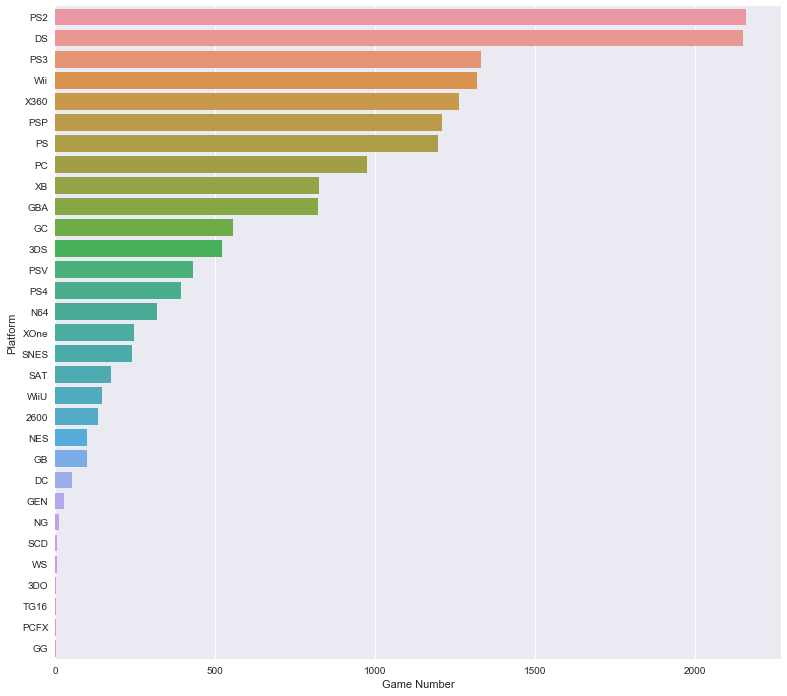

In [63]:
ax = sns.barplot(y = 'Platform', x = 'Name', data = game_rating.groupby(['Platform']).count().reset_index().sort_values('Name', ascending= False))
fig = plt.gcf()
fig.set_size_inches(13, 12)
ax.set(xlabel = 'Game Number', ylabel = 'Platform')
plt.show()

### Clearly, PS2 and DS are the top 2 platform in terms of number of games. Next, more exploration

In [64]:
a = game_rating['Year_of_Release'].value_counts().reset_index().sort_values('index')

### Below is the number of games against year. The peak is around 2005 - 2010. The total number of games dropped. My personal guess for the reason is the increased cost for making a descent game. 

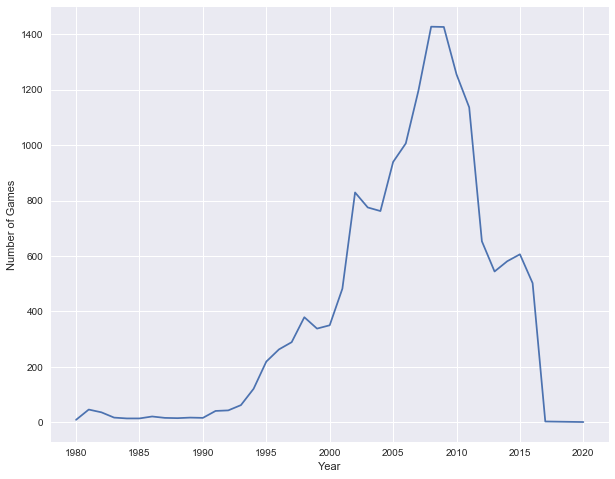

In [65]:
plt.figure(figsize=(10,8)) 
plt.plot(a['index'], a['Year_of_Release'])
plt.xlabel('Year')
plt.ylabel('Number of Games')

### Next is the top 20 publisher for games. EA had more than 1300 titles! That is a lot!

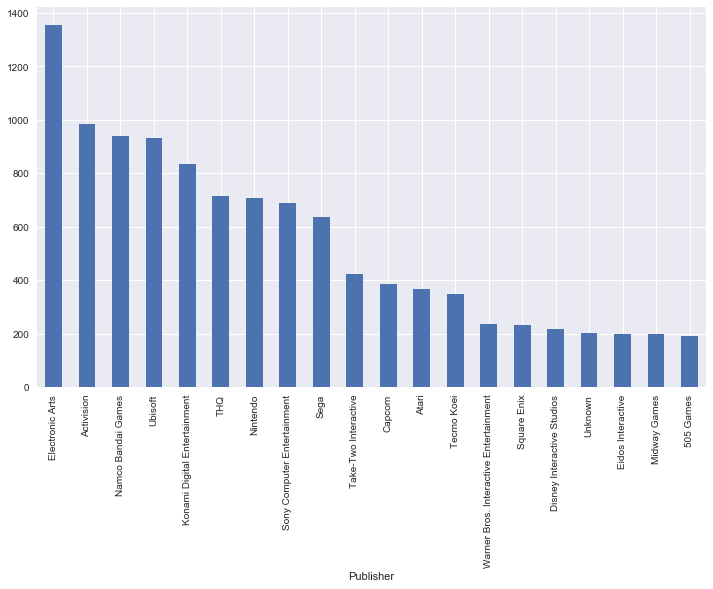

In [66]:
game_rating.groupby('Publisher').count().sort_values('Name', ascending = False)[:20]['Name'].plot(kind = 'bar', figsize = (12,7))

### Also, there are lots of action games. :)

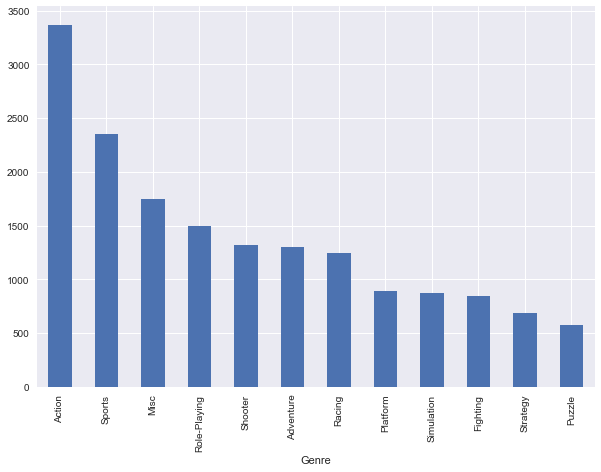

In [67]:
game_rating.groupby('Genre').count().sort_values('Name', ascending = False)['Name'].plot(kind = 'bar', figsize = (10,7))

### Now, let's take a look at the games which were sold well. The following tables are the top 10 games sold in NA, EU, and JP, respectively.

In [68]:
game_rating.sort_values('NA_Sales').iloc[:10, :5]

,Name,Platform,Year_of_Release,Genre,Publisher
8359,Bomberman B-Daman,SNES,1996.0,Shooter,Hudson Soft
11304,Theme Park,SAT,1994.0,Simulation,Electronic Arts
11301,Pachitte Chonmage Tatsujin 13: Pachinko Hissat...,PS2,2007.0,Misc,Hackberry
11298,SD Gundam G Generation Genesis,PS4,2016.0,Strategy,Namco Bandai Games
11295,Toukiden 2,PS4,2016.0,Action,Tecmo Koei
11288,Counter-Strike: Source,PC,2004.0,Shooter,Vivendi Games
11287,Famicom Mini: Famicom Mukashi Banashi - Shin O...,GBA,2004.0,Adventure,Nintendo
11286,Virtua Fighter CG Portrait Series Vol.2: Jacky...,SAT,1995.0,Misc,Sega
11282,Bleach: Heat the Soul 5,PSP,2008.0,Fighting,Sony Computer Entertainment
11281,Beat Sketch!,PS3,2010.0,Misc,Sony Computer Entertainment


In [69]:
game_rating.sort_values('EU_Sales').iloc[:10, :5]

,Name,Platform,Year_of_Release,Genre,Publisher
8359,Bomberman B-Daman,SNES,1996.0,Shooter,Hudson Soft
10586,KORG DS-10 Synthesizer Plus,DS,2009.0,Misc,AQ Interactive
10587,Darius Gaiden,SAT,1995.0,Shooter,Acclaim Entertainment
10589,All Kamen Rider: Rider Generation 2,DS,2012.0,Action,Namco Bandai Games
10591,Draglade,DS,2007.0,Fighting,505 Games
10592,Scribblenauts Unmasked: A DC Comics Adventure,3DS,2013.0,Puzzle,Warner Bros. Interactive Entertainment
10593,Fallout 3 Game Add-On Pack: The Pitt and Opera...,X360,2009.0,Role-Playing,Bethesda Softworks
10597,Lord of Apocalypse,PSV,2011.0,Role-Playing,Square Enix
10582,Tatsunoko vs. Capcom: Cross Generation of Heroes,Wii,2008.0,Fighting,Capcom
10598,Igor: The Game,Wii,2008.0,Adventure,CDV Software Entertainment


In [70]:
game_rating.sort_values('JP_Sales').iloc[:10, :5]

,Name,Platform,Year_of_Release,Genre,Publisher
15138,Board Game: Top Shop,PS,1999.0,Misc,Success
7027,Grand Slam Tennis 2,PS3,2012.0,Sports,Electronic Arts
11815,Again,DS,2009.0,Adventure,Ackkstudios
7029,Airblade,PS2,2001.0,Sports,Sony Computer Entertainment
7030,Mega Man & Bass,GBA,2002.0,Platform,Capcom
7031,Ratchet & Clank: Full Frontal Assault,PS3,2012.0,Adventure,Sony Computer Entertainment
11814,Blood Drive,PS3,2010.0,Racing,Activision
11810,The Hustle: Detroit Streets,PSP,2005.0,Sports,Deep Silver
7026,Mafia,XB,2004.0,Action,Take-Two Interactive
15208,Falcon 4.0: Allied Force,PC,2005.0,Simulation,Graphsim Entertainment


### Lastly, number of each ratings categories. 

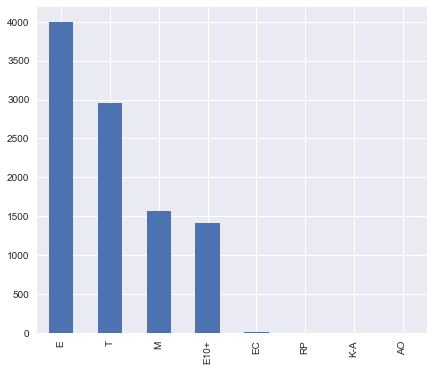

In [71]:
game_rating['Rating'].value_counts().plot(kind = 'bar', figsize = (7,6))